In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

blocks = ['block_1', 'block_2', 'block_3', 'block_4']
result_dir = './../CVPR_transferlearning/CVPR2020_results/taskonomy_5000/'
rankings = {}
for block in blocks:
    result_path = os.path.join(result_dir,'rankings_places' + block + '.npy')
    rankings[block] = np.load(result_path,allow_pickle=True).item()
print(rankings)

{'block_1': {'autoencoder': 0.8253025594088609, 'edge3d': 0.556744448953139, 'colorization': 0.7638028901672479, 'rgb2sfnorm': 0.4920548513393701, 'vanishing_point': 0.20078176862953384, 'segmentsemantic': 0.5730052130162643, 'keypoint2d': 0.626206824803373, 'class_1000': 0.5375852868728179, 'segment25d': 0.5462202363922137, 'class_places': 0.5487715730576032, 'curvature': 0.580808081959179, 'edge2d': 0.7525376886698556, 'inpainting_whole': 0.8353525761784374, 'room_layout': 0.4186401187897234, 'keypoint3d': 0.56663043235883, 'reshade': 0.5286855727127041, 'rgb2depth': 0.4915315533595394, 'rgb2mist': 0.48356475688305417, 'denoise': 0.8231575688233012, 'segment2d': 0.698305991011186}, 'block_2': {'autoencoder': 0.7453675049001288, 'edge3d': 0.6541476602317061, 'colorization': 0.7737290564251103, 'rgb2sfnorm': 0.5992137136457802, 'vanishing_point': 0.2610163924742583, 'segmentsemantic': 0.6360079847536327, 'keypoint2d': 0.6089796312287199, 'class_1000': 0.5730597090637718, 'segment25d': 

In [2]:
tasks = ['autoencoder','class_1000', 'class_places', 'colorization','curvature',\
                   'denoise', 'edge2d', 'edge3d', \
                   'inpainting','keypoint2d', 'keypoint3d', \
                   'reshade', 'rgb2depth', 'rgb2mist', 'rgb2sfnorm','room_layout' ,\
                   'segment25d', 'segment2d', 'semantic_seg.', 'vanishing_point']
tasks_2D =['autoencoder', 'colorization',\
                   'denoise', 'edge2d',  \
                   'inpainting','keypoint2d', \
                    'segment2d']
tasks_3D = ['curvature', 'edge3d','reshade', 'rgb2depth', 'rgb2mist', 'rgb2sfnorm','segment25d','keypoint3d']
tasks_semantic = ['class_1000', 'class_places','semantic_seg.']

block_1 0.0 0.0 0.0
block_2 0.0 0.0 0.0
block_3 0.0 0.0 0.0
block_4 0.0 0.0 0.0


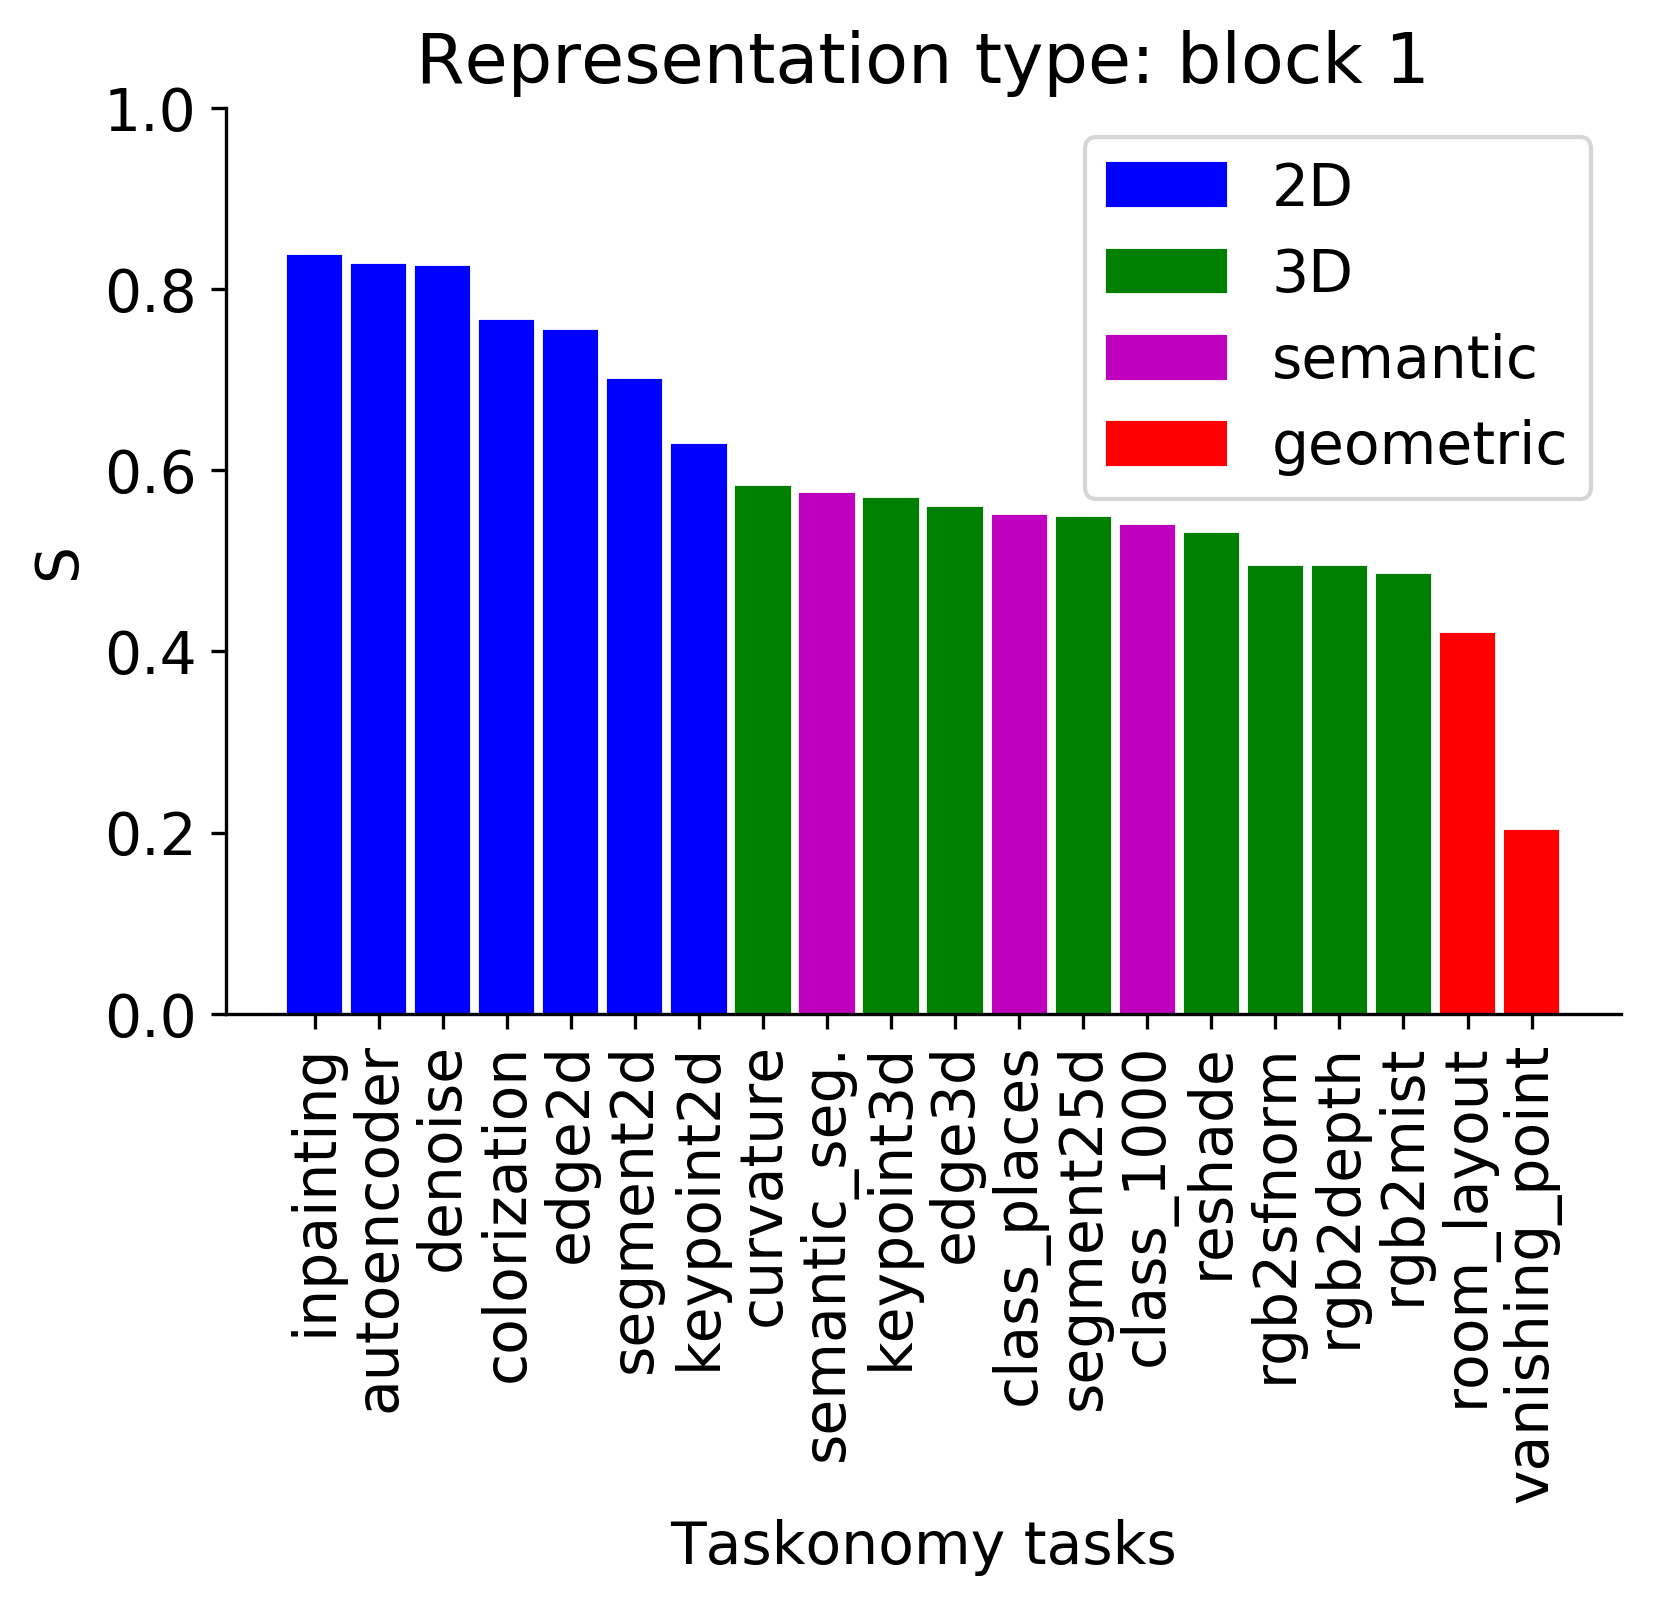

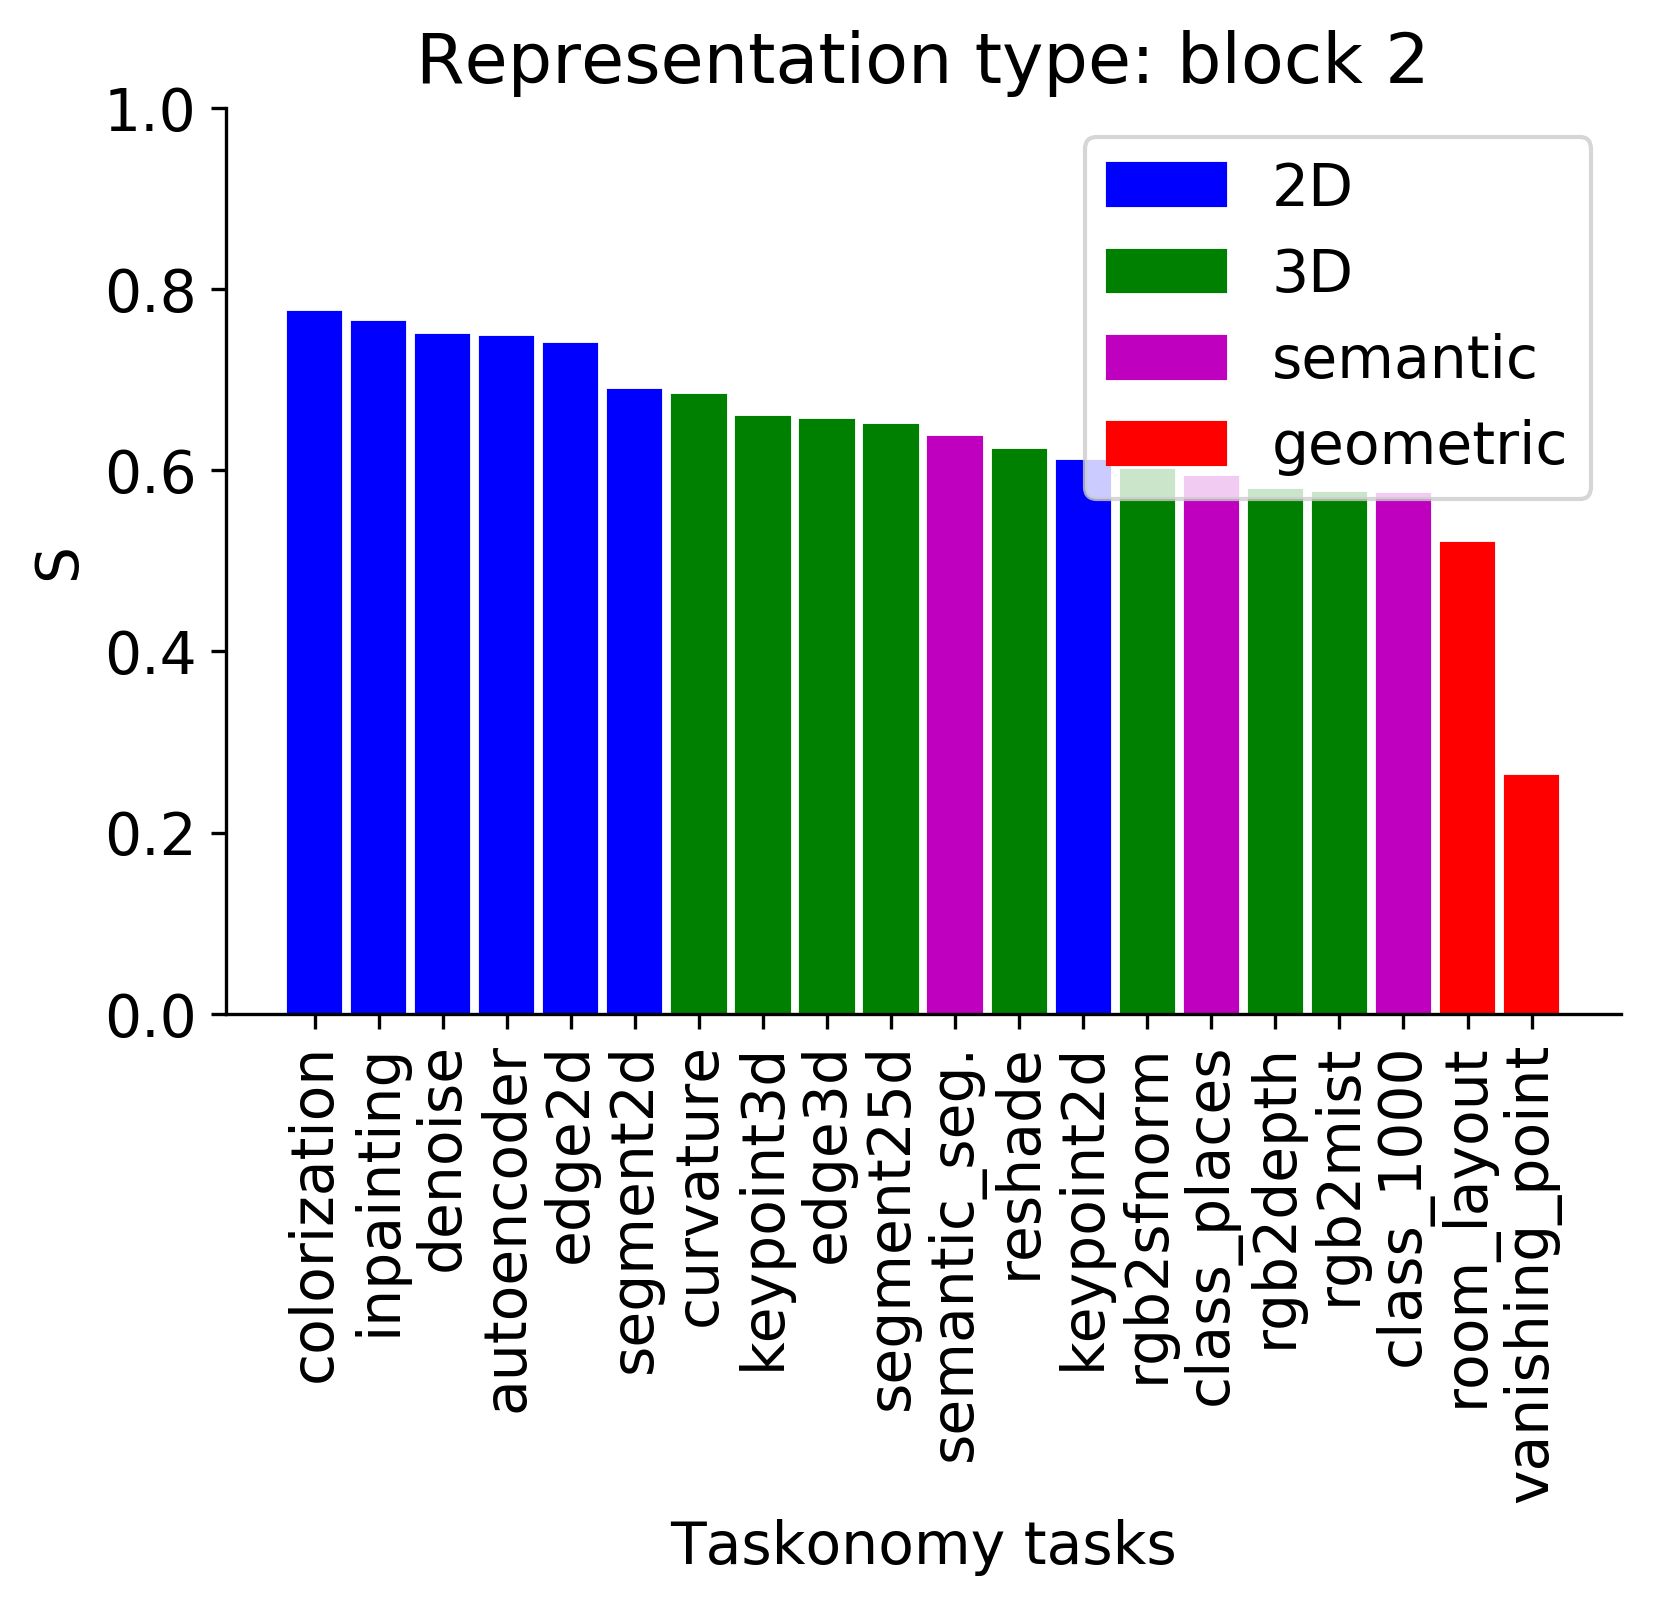

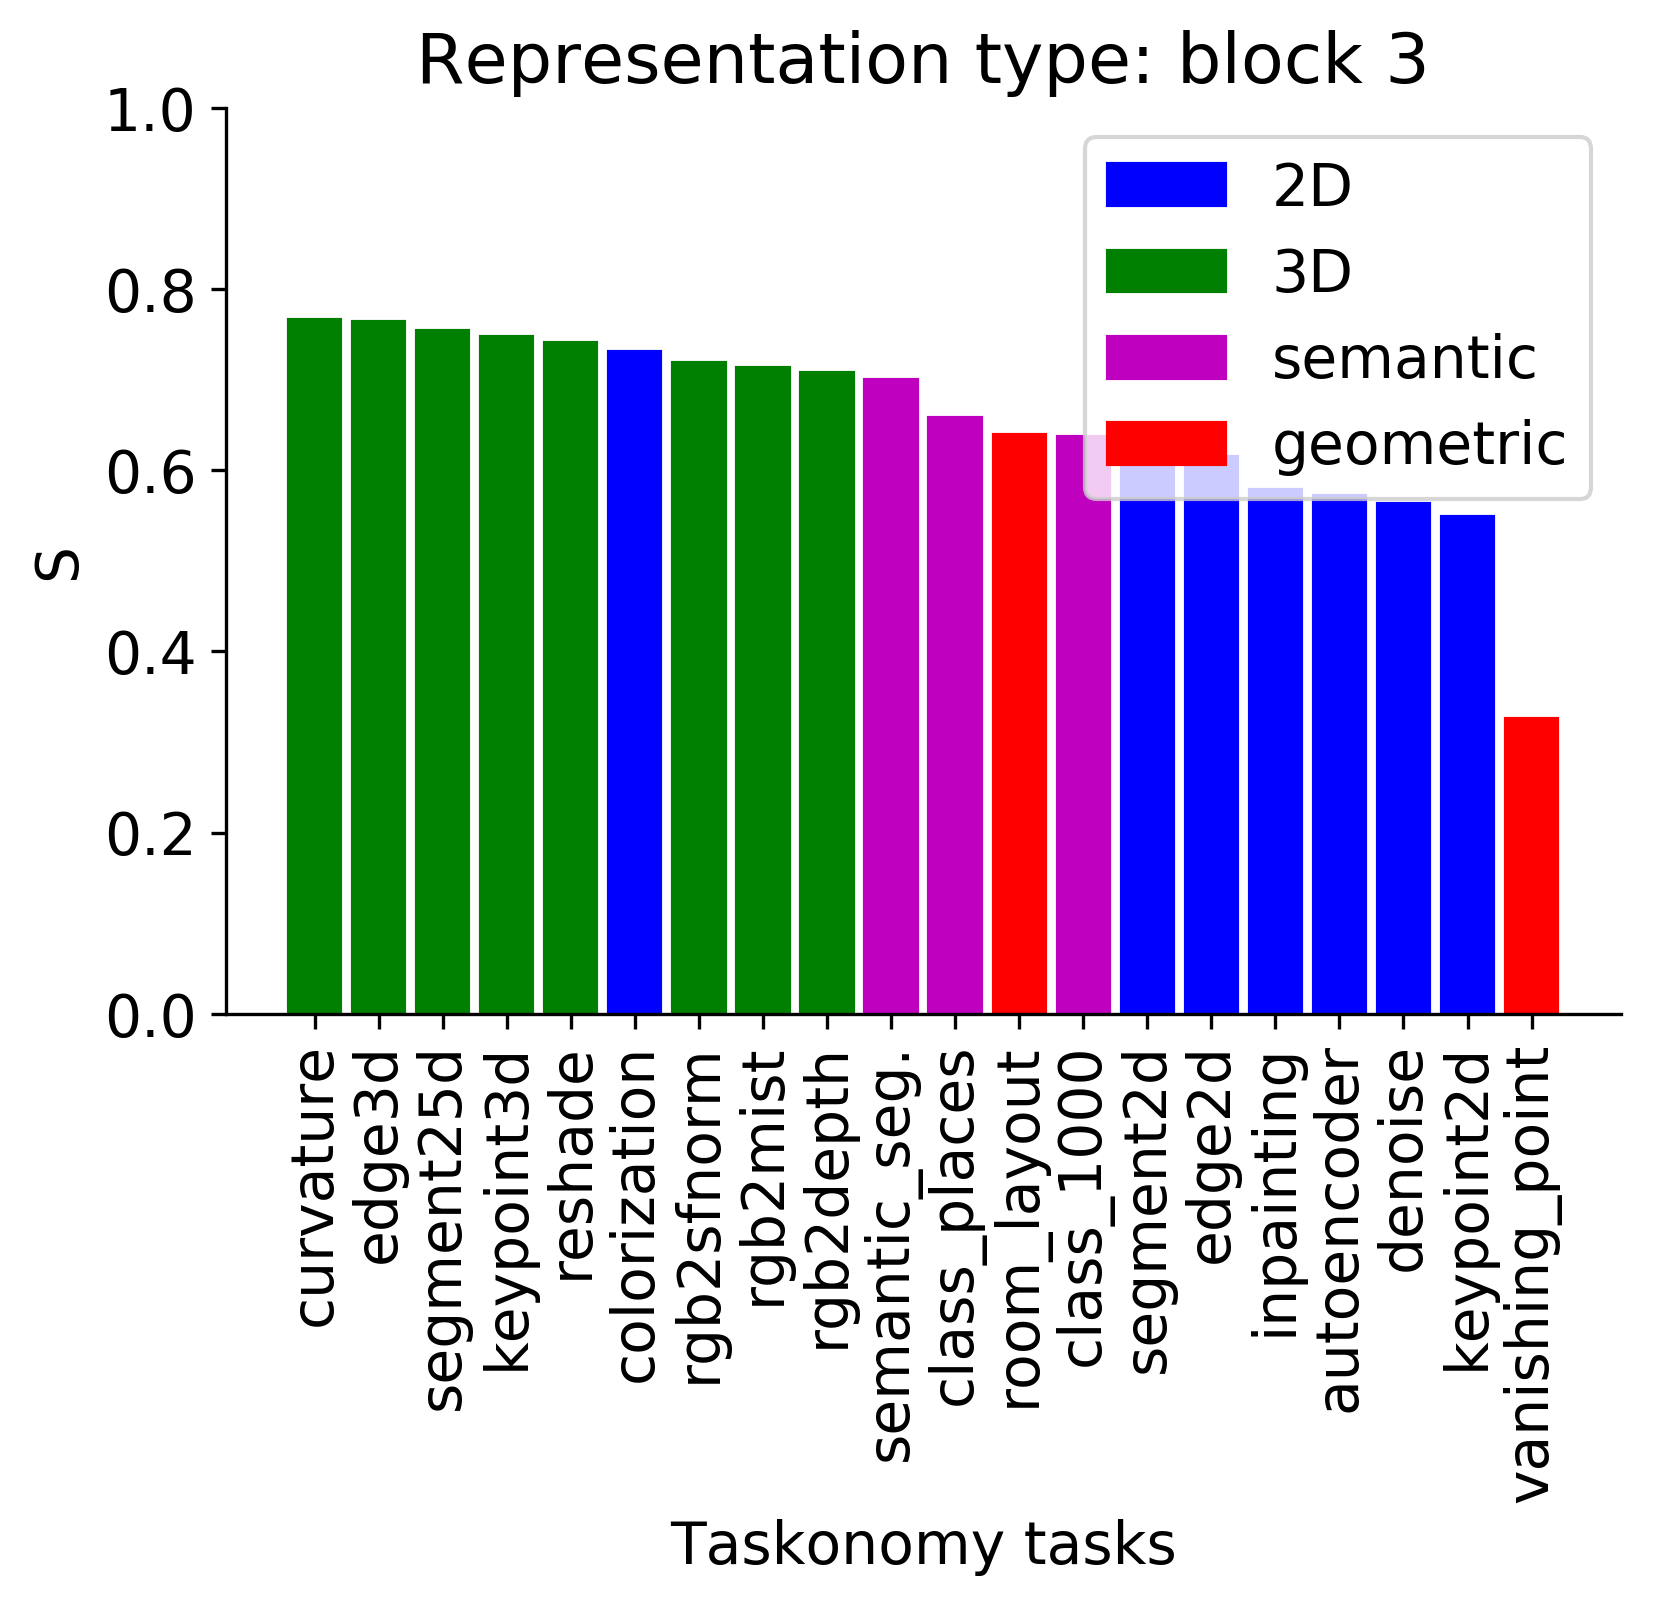

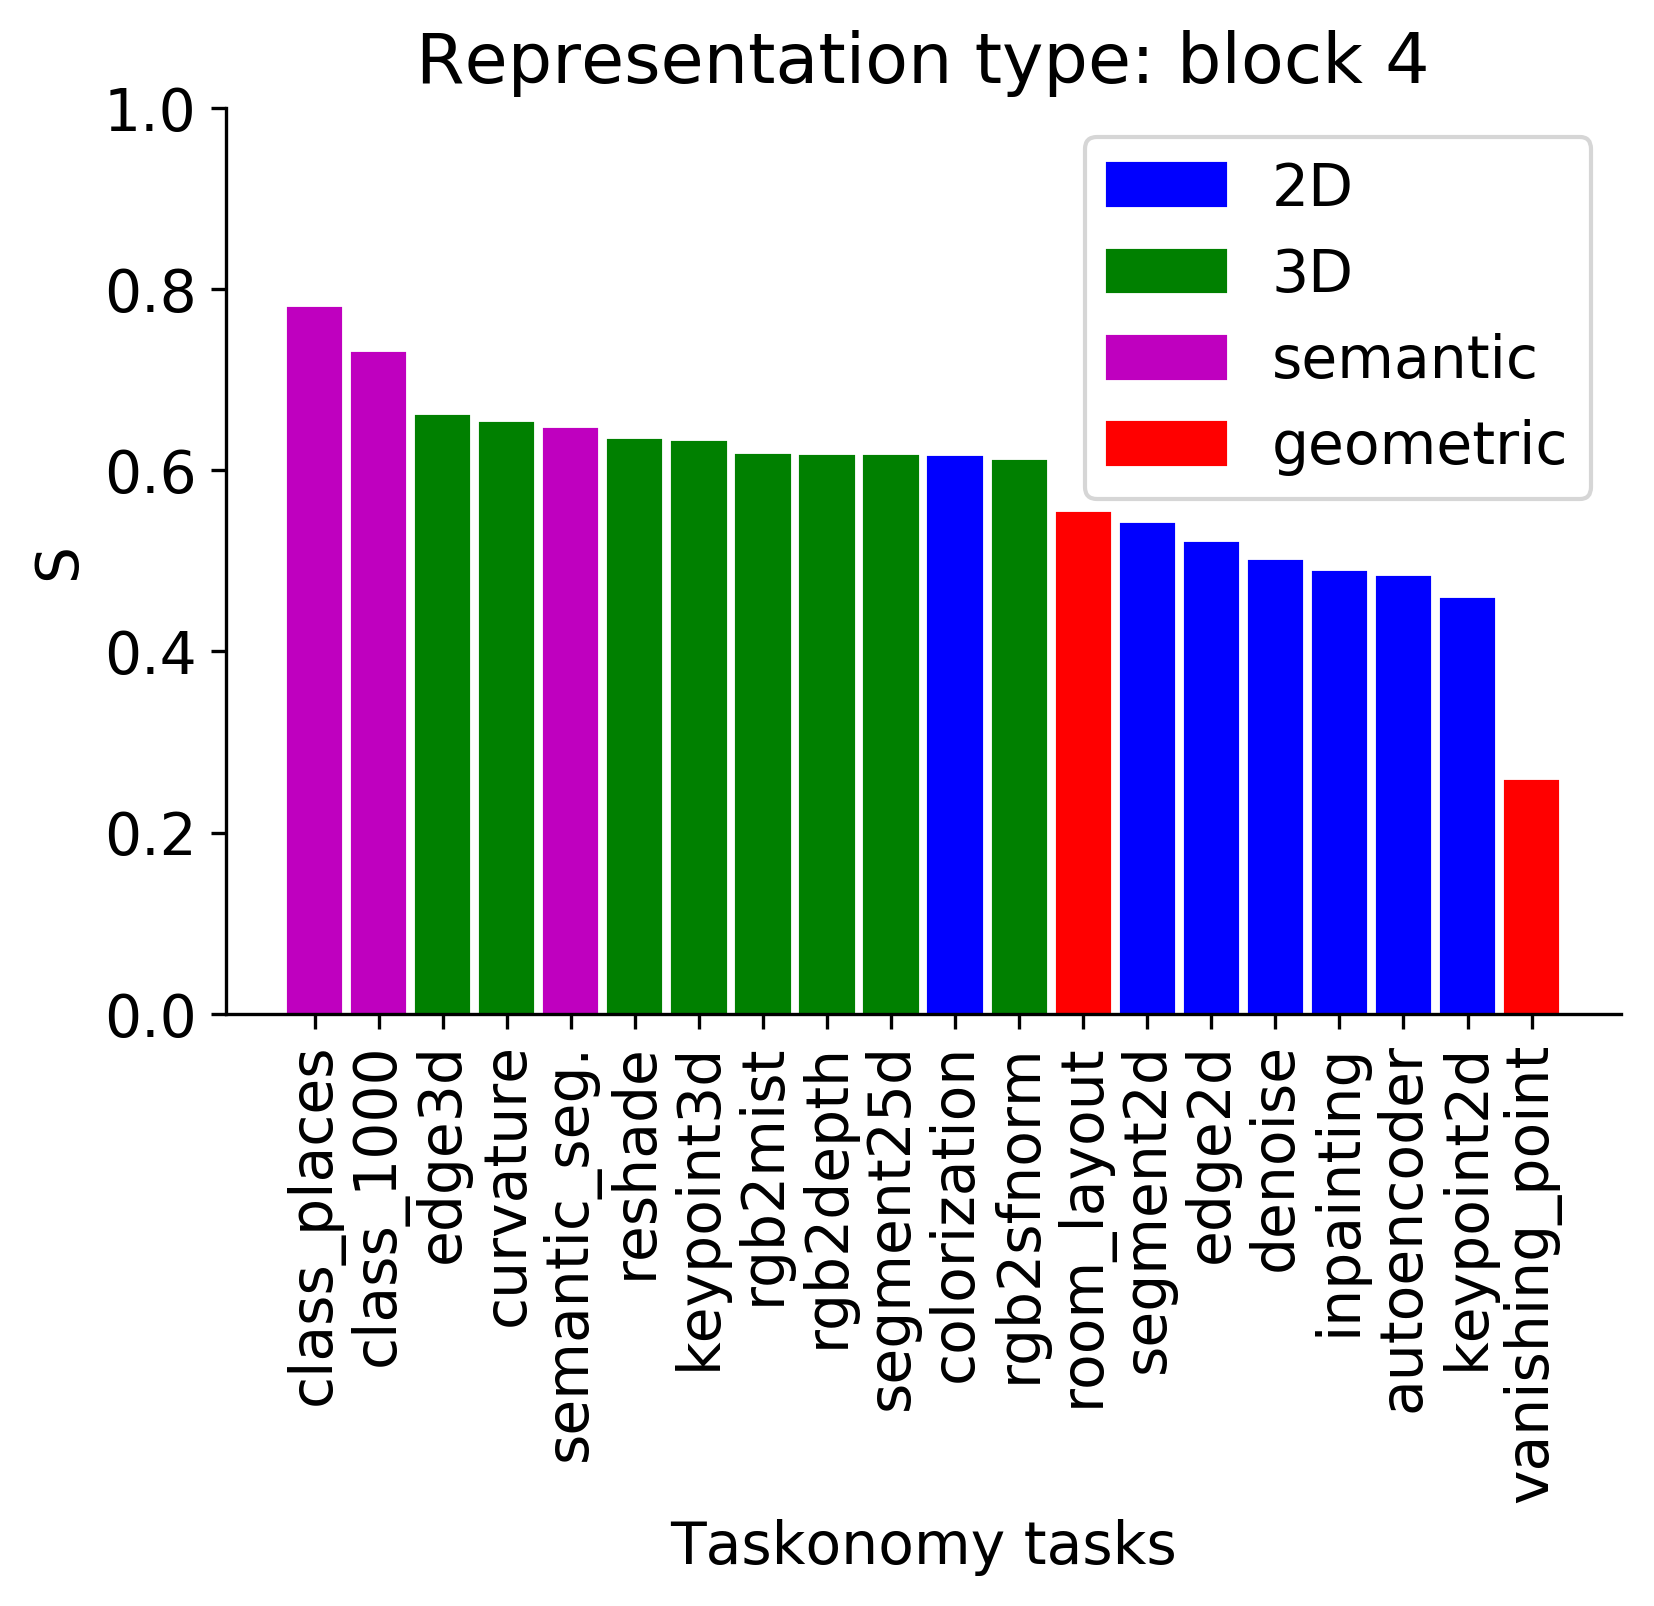

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
save_dir = './block_rankings_new_places/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.rcParams.update({'font.size': 14})
blocks_name = ['block 1', 'block 2', 'block 3', 'block 4']
for b,block in enumerate(blocks):
    rbf_cka = rankings[block]
    fig,ax = plt.subplots( nrows=1, ncols=1 )
    x=[]
    y=[]
    for w in sorted(rbf_cka, key=rbf_cka.get, reverse=True):
        if w == 'inpainting_whole':
            x.append('inpainting')
            y.append(rbf_cka[w])
        elif w == 'segmentsemantic':
            x.append('semantic_seg.')
            y.append(rbf_cka[w])
        else:
            x.append(w)
            y.append(rbf_cka[w])
        #print (w, rbf_cka[w])

    barlist = plt.bar(range(len(rbf_cka)), list(y), align='center')
    labels = [None]*4
    mean_2D = 0
    mean_3D = 0
    mean_sem = 0
    count_2D = 0
    count_3D = 0
    count_sem = 0
    for i in range(len(x)):
        if x[i] in tasks_2D:
            barlist[i].set_color('b')
            labels[0] = barlist[i]
            count_2D+=1
            #mean_2D+=rbf_cka[x[i]]
        elif x[i] in tasks_3D:
            barlist[i].set_color('g')
            labels[1] = barlist[i]
            count_3D+=1
            #mean_3D+=rbf_cka[x[i]]
        elif x[i] in tasks_semantic:
            barlist[i].set_color('m')
            labels[2] = barlist[i]
            count_sem+=1
            #mean_sem+=rbf_cka[x[i]]
        else:
            barlist[i].set_color('r')
            labels[3] = barlist[i]
    print(block,mean_2D/count_2D,mean_3D/count_3D,mean_sem/count_sem)
    plt.xticks(range(len(rbf_cka)), list(x))
    plt.ylabel("S" )
    plt.xlabel("Taskonomy tasks")
    plt.ylim([0,1.0])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_position(("data",0))
    plt.xticks(rotation=90)
    plt.legend(labels, ['2D', '3D','semantic','geometric'])
    plt.title ("Representation type: " + blocks_name[b])
    fig.savefig(save_dir+block + '.png', bbox_inches="tight")
    fig.savefig(save_dir+block + '.pdf', bbox_inches="tight")
    fig.savefig(save_dir+block + '.svg', bbox_inches="tight")